In [2]:
import pandas as pd
import gzip
import json
import numpy as np
pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [3]:
file_path = "reviews_Cell_Phones_and_Accessories_5.json.gz"

In [4]:
phone_df = pd.read_json(file_path, lines = True)
phone_df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]","Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one.",4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"
5,APX47D16JOP7H,120401325X,RLH,"[1, 2]",These make using the home button easy. My daughter and I both like them. I would purchase them again. Well worth the price.,3,Cute,1381536000,"10 12, 2013"
6,A1JVVYYO7G56DS,120401325X,Tyler Evans,"[0, 0]",Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.,5,best thing ever..,1377129600,"08 22, 2013"
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,"[1, 2]",it worked for the first week then it only charge my phone to 20%. it is a waste of money.,1,not a good Idea,1384992000,"11 21, 2013"
8,A2JWEDW5FSVB0F,3998899561,Adam,"[2, 3]","Good case, solid build. Protects phone all around with good access to buttons. Battery charges with full battery lasts me a full day. I usually leave my house around 7am and return at 10pm. I'm glad that it lasts from start to end. 5/5",5,Solid Case,1380067200,"09 25, 2013"
9,A8AJS1DW7L3JJ,3998899561,Agata Majchrzak,"[1, 1]","This is a fantastic case. Very stylish and protects my phone. Easy access to all buttons and features, without any loss of phone reception. But most importantly, it double power, just as promised. Great buy",5,Perfect Case,1396483200,"04 3, 2014"


In [5]:
len(phone_df)

194439

In [6]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [7]:
phone_df_clean = phone_df.dropna().reset_index(drop = True)
phone_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190920 entries, 0 to 190919
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      190920 non-null  object
 1   asin            190920 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         190920 non-null  object
 4   reviewText      190920 non-null  object
 5   overall         190920 non-null  int64 
 6   summary         190920 non-null  object
 7   unixReviewTime  190920 non-null  int64 
 8   reviewTime      190920 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.1+ MB


In [8]:
ratings_count = phone_df_clean['overall'].value_counts()
ratings_count

5    106573
4    39305 
3    21075 
1    13078 
2    10889 
Name: overall, dtype: int64

In [9]:
ratings_count_props = phone_df_clean['overall'].value_counts(normalize = True)
ratings_count_props

5    0.558208
4    0.205872
3    0.110387
1    0.068500
2    0.057034
Name: overall, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


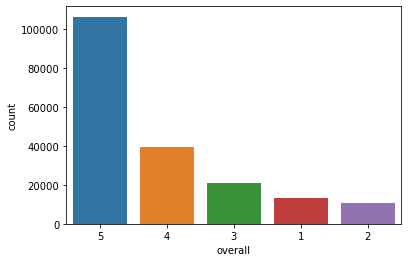

In [11]:
sns.countplot(phone_df_clean['overall'], order=phone_df_clean['overall'].value_counts(ascending=False).index)
plt.show()

In [12]:
reviewer_count = phone_df_clean['reviewerName'].value_counts(ascending=False)
reviewer_count.head(10)

Amazon Customer                3562
Pen Name                       344 
John                           268 
Chris                          234 
Mike                           224 
David                          218 
Michael                        177 
Ryan                           177 
Mike Tarrani "Jazz Drummer"    152 
Paul                           145 
Name: reviewerName, dtype: int64

In [13]:
# Extract columns of interest into a new dataframe
data_df = phone_df_clean[['overall', 'reviewText']]
data_df.head()

,overall,reviewText
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."


In [14]:
# rename columns to class and text
df_renamed = data_df.rename(columns = {'overall': 'class', 'reviewText': 'text'})
df_renamed.tail(10)

,class,text
190910,5,"Ahah, I love it. The case looks better than the amazon photo, and it feels really really neat."
190911,5,"As someone who owns an iPhone, I absolutely love this case. It has a brilliant color and stands out amongst all of the other cases out there. It works amazingly well to keep my phone protected. I am horrible about dropping my phone, but this case has helped to prevent it from getting damaged. I highly recommend this case to anyone looking to protect their phone and look amazing doing it."
190912,5,"What a high quality cable. Right out of the pack you can tell that this is not your cheap, replacement ipod/iphone cable. This thing has substance! It also holds well while connected and doesn't fall out..I have had that problem with some aftermarket charging cables. This is really one of the nicest cables I have every seen. Great buy for sure!"
190913,4,"This one actually works unlike some others I bought I get error msg saying this is unauthorized will not charge. This feels durable and not some flimsy garbage wire. The best part of this wire is, it is long enough for it to be plugged in and I can actually still use my phone while its charging since the wire is long enough."
190914,5,"I don't like the word ""hate"", so let's just say that there are two things that I *can't stand*.1) I can't stand paying full price for an Apple Lightning cable.2) I can't stand getting the message that this cable is not compatible with your device message.This cable is fantastic. It is short, which I like. (I don't need more than a couple of feet of cable coiled up on my desk.) It charges well and doesn't give me the error. Hooray!I like the black color of the cable and I like the nice substantial PVC coating. This cable feels very sturdy and I'm confident that it won't fall apart like some of my other generic cables. I suppose that with a name like Liger, how could you go wrong? (Napoleon Dynamite would approve.)I was provided this item for review."
190915,5,Works great just like my original one. I really need extras of these for the car and house so love this and the price!
190916,5,Great product. Great packaging. High quality and apple certified. Works greats. This was a good replacement for my apple cable that is falling apart. I highly recommend this cable.
190917,5,"This is a great cable, just as good as the more expensive Apple one. My husband and my daughter both lost their original cables for their iPhones and they went the cheap route, buying a cheap replacement cable, I believe it messed up their battery memory because coincidentally both of them have battery hold/charge issues but my son and I do not. I used this cable to charge my husbands phone and it charged it from 3% to 100% in about an hour, that's about how long it takes my phone to charge but with the cheap cable his takes 2-1/2 hours. I'm thrilled with the quality of this cable, I'm hoping now that we have &#34;quality&#34; cables again, maybe the battery memory will improve on their phones. Great cable at a great price. I definitely recommend."
190918,5,I really like it becasue it works well with my Life Proof case. I do not have to remove the case to charge my phone.
190919,5,"product as described, I have wasted a lot of money on cords. I would buy them (usually on road trips) and then go to plug my phone in just to discover I have to work with cord and leave my phone sit while it was charging. This cord has not given me any issues, works just like my original!!"


## Text Preprocessing

In [ ]:
# Extract 5% for Machine Learning
msk = 

In [15]:
from io import StringIO

df_renamed['class_id'] = df_renamed['class'].factorize()[0]
class_id_df = df_renamed[['class', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'class']].values)
df_renamed.head()

,class,text,class_id
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,0
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),1
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,1
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one.",0
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",1


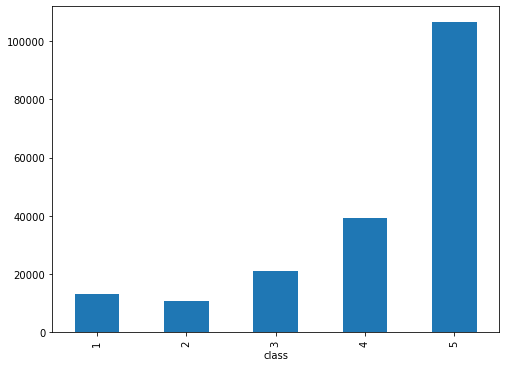

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_renamed.groupby('class').text.count().plot.bar(ylim=0)
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', max_features = 500, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_renamed['text']).toarray()
labels = df_renamed['class_id']
features.shape

(190920, 500)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [19]:
# Naive Bayes Multinomial 
from sklearn.naive_bayes import MultinomialNB

In [20]:
df_renamed['text'].shape, df_renamed['class'].shape, df_renamed['class_id'].shape

((190920,), (190920,), (190920,))

In [21]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_renamed['text'], df_renamed['class_id'], random_state = 0)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((143190,), (143190,), (47730,), (47730,))

In [23]:
# Count Vectorizer
cnt_vec = CountVectorizer()
X_train_cnt_vec = cnt_vec.fit_transform(X_train)

In [24]:
X_train_cnt_vec.shape

(143190, 73340)

In [25]:
# Hashing with TF-IDF
tfidfTransformer = TfidfTransformer()
X_train_tfidfTransformer  = tfidfTransformer.fit_transform(X_train_cnt_vec)

In [26]:
X_train_tfidfTransformer.shape, y_train.shape

((143190, 73340), (143190,))

In [28]:
# Naive Bayes Classifier
clf = MultinomialNB().fit(X_train_tfidfTransformer, y_train)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


In [31]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(max_iter=500, random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.610371
LogisticRegression        0.614325
MultinomialNB             0.569265
RandomForestClassifier    0.558208
Name: accuracy, dtype: float64